In [ ]:
# Step 1: Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display all columns in output
pd.set_option('display.max_columns', None)


In [ ]:
from google.colab import files


# After upload, read the CSV file
df = pd.read_csv('Used_Car_Price_Prediction.csv')

# Display top 5 rows
df.head()


,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [ ]:
# Check shape and info
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Basic statistics
print("\nStatistical Summary:\n", df.describe())


Shape of dataset: (7400, 29)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7400 non-null   object 
 1   yr_mfr               7400 non-null   int64  
 2   fuel_type            7400 non-null   object 
 3   kms_run              7400 non-null   int64  
 4   sale_price           7400 non-null   int64  
 5   city                 7400 non-null   object 
 6   times_viewed         7400 non-null   int64  
 7   body_type            7297 non-null   object 
 8   transmission         6844 non-null   object 
 9   variant              7400 non-null   object 
 10  assured_buy          7400 non-null   bool   
 11  registered_city      7390 non-null   object 
 12  registered_state     7390 non-null   object 
 13  is_hot               7400 non-null   bool   
 14  rto                  7400 non-null   object 

In [ ]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Check column names
print("\nColumn Names:\n", df.columns.tolist())


Duplicate Rows: 1

Column Names:
 ['car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'city', 'times_viewed', 'body_type', 'transmission', 'variant', 'assured_buy', 'registered_city', 'registered_state', 'is_hot', 'rto', 'source', 'make', 'model', 'car_availability', 'total_owners', 'broker_quote', 'original_price', 'car_rating', 'ad_created_on', 'fitness_certificate', 'emi_starts_from', 'booking_down_pymnt', 'reserved', 'warranty_avail']


In [ ]:
# Remove duplicate row
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)


After removing duplicates: (7399, 29)


In [ ]:
# Check missing values percentage
(df.isnull().sum() / len(df)) * 100


,0
car_name,0.000000
yr_mfr,0.000000
fuel_type,0.000000
kms_run,0.000000
sale_price,0.000000
city,0.000000
times_viewed,0.000000
body_type,1.392080
transmission,7.514529
variant,0.000000


In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in ['fuel_type', 'transmission', 'car_rating', 'warranty_avail', 'is_hot', 'assured_buy']:
    if col in df.columns:
        df[col] = label_enc.fit_transform(df[col].astype(str))


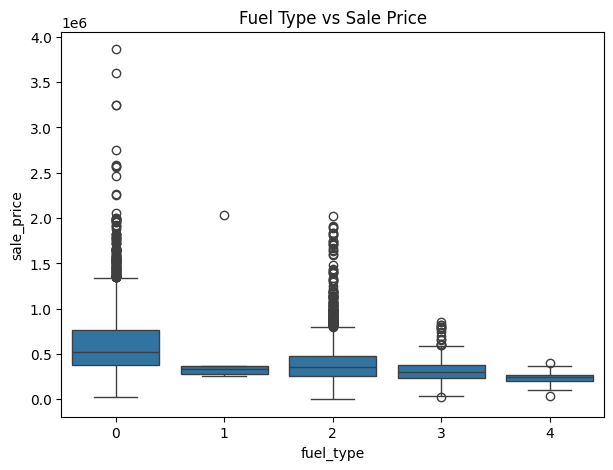

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='fuel_type', y='sale_price', data=df)
plt.title("Fuel Type vs Sale Price")
plt.show()


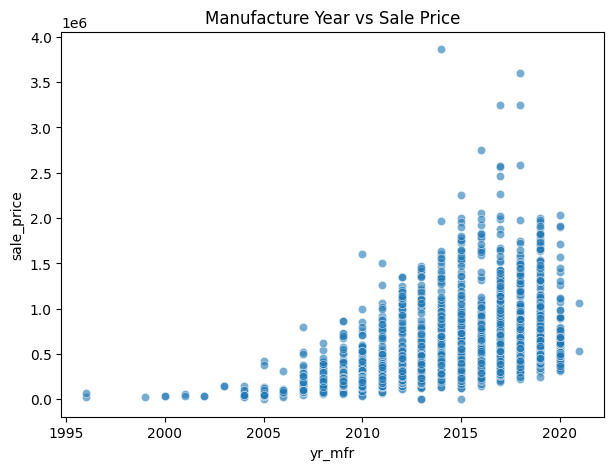

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='yr_mfr', y='sale_price', data=df, alpha=0.6)
plt.title("Manufacture Year vs Sale Price")
plt.show()


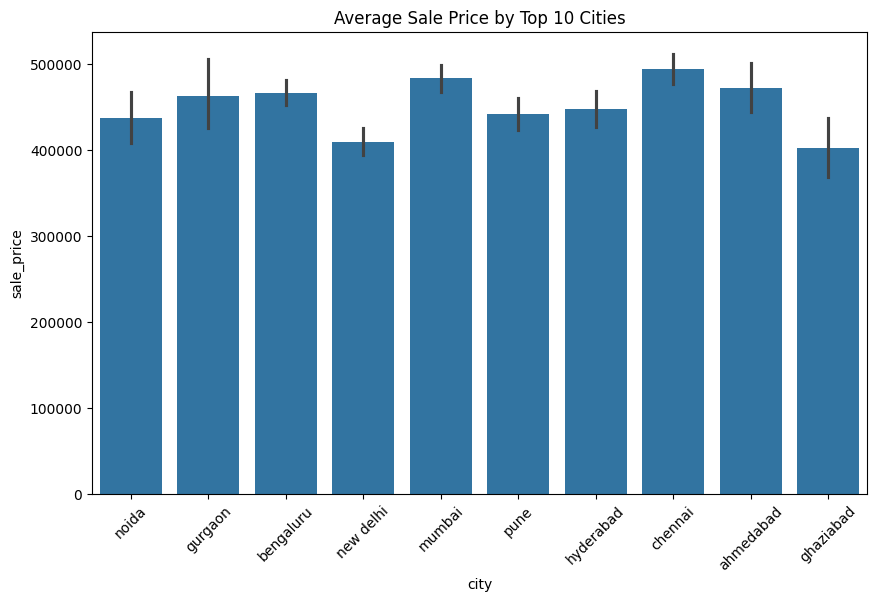

In [ ]:
top_cities = df['city'].value_counts().nlargest(10).index
plt.figure(figsize=(10,6))
sns.barplot(x='city', y='sale_price', data=df[df['city'].isin(top_cities)])
plt.title("Average Sale Price by Top 10 Cities")
plt.xticks(rotation=45)
plt.show()


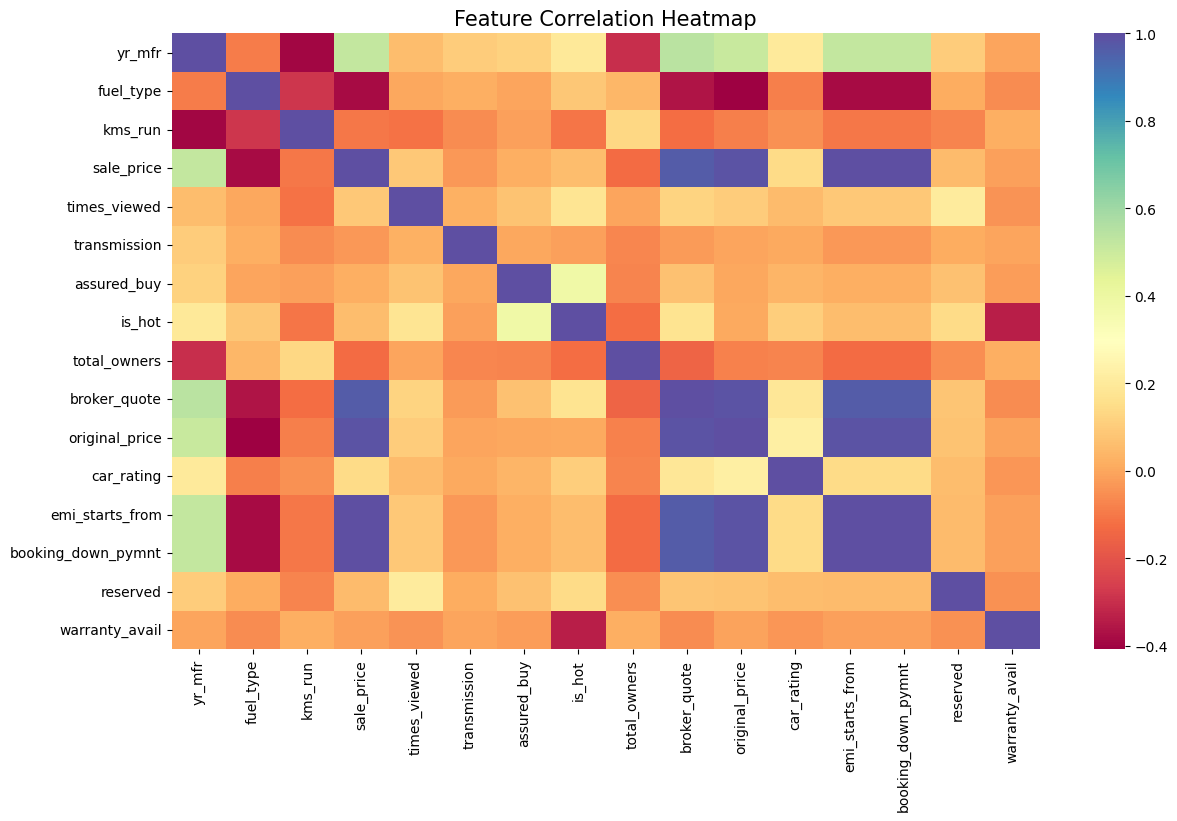

In [ ]:
plt.figure(figsize=(14,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='Spectral', annot=False)
plt.title("Feature Correlation Heatmap", fontsize=15)
plt.show()


/tmp/ipython-input-248901503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='make', y='sale_price', data=df[df['make'].isin(top_brands)], palette='cool')


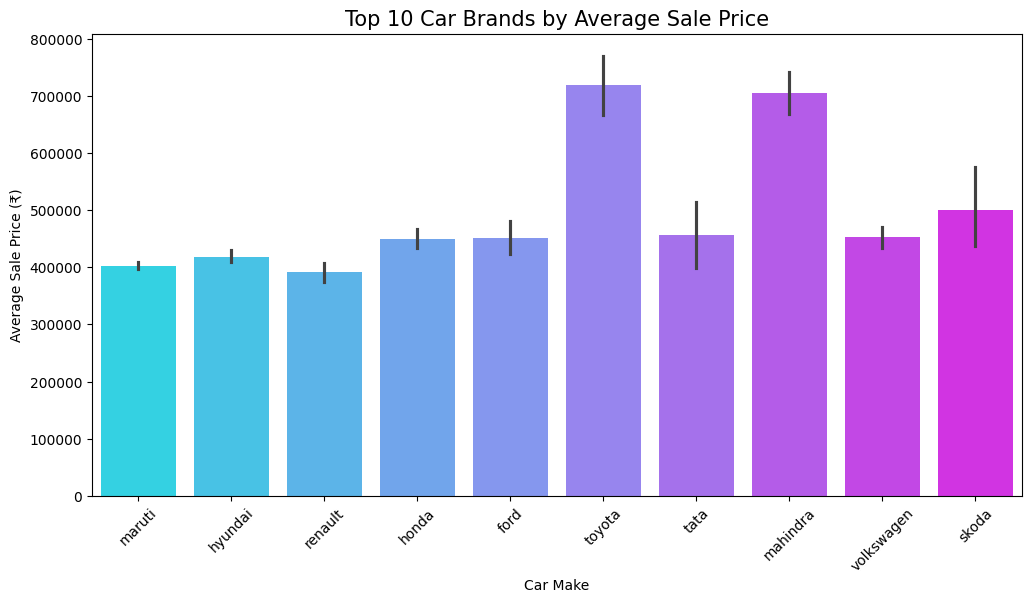

In [ ]:
plt.figure(figsize=(12,6))
top_brands = df['make'].value_counts().nlargest(10).index
sns.barplot(x='make', y='sale_price', data=df[df['make'].isin(top_brands)], palette='cool')
plt.title("Top 10 Car Brands by Average Sale Price", fontsize=15)
plt.xlabel("Car Make")
plt.ylabel("Average Sale Price (₹)")
plt.xticks(rotation=45)
plt.show()


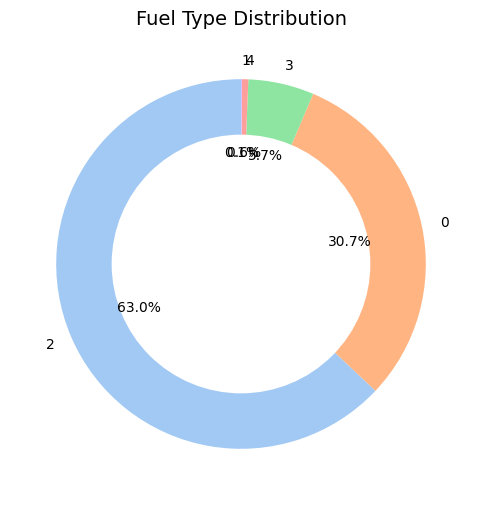

In [ ]:
fuel_counts = df['fuel_type'].value_counts()
colors = sns.color_palette('pastel')[0:len(fuel_counts)]

plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Fuel Type Distribution", fontsize=14)
plt.show()


/tmp/ipython-input-1793066058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transmission', data=df, palette='magma')


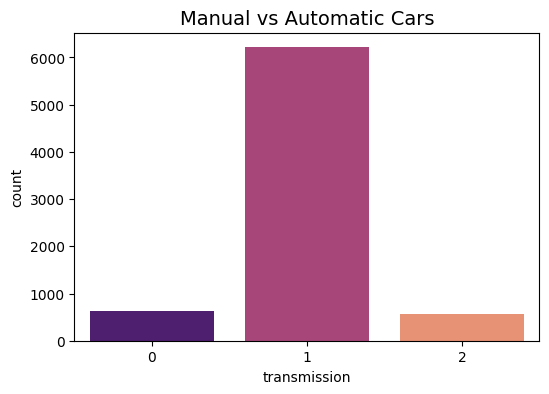

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='transmission', data=df, palette='magma')
plt.title("Manual vs Automatic Cars", fontsize=14)
plt.show()


/tmp/ipython-input-3235253838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='total_owners', y='sale_price', data=df, palette='rainbow')


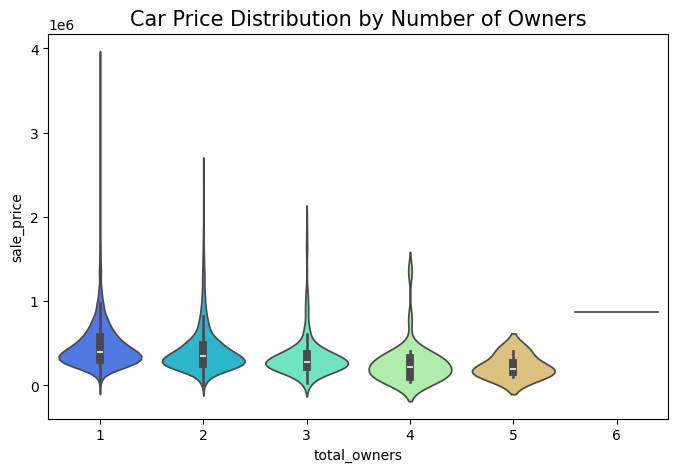

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x='total_owners', y='sale_price', data=df, palette='rainbow')
plt.title("Car Price Distribution by Number of Owners", fontsize=15)
plt.show()


/tmp/ipython-input-4187935834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette='Spectral')


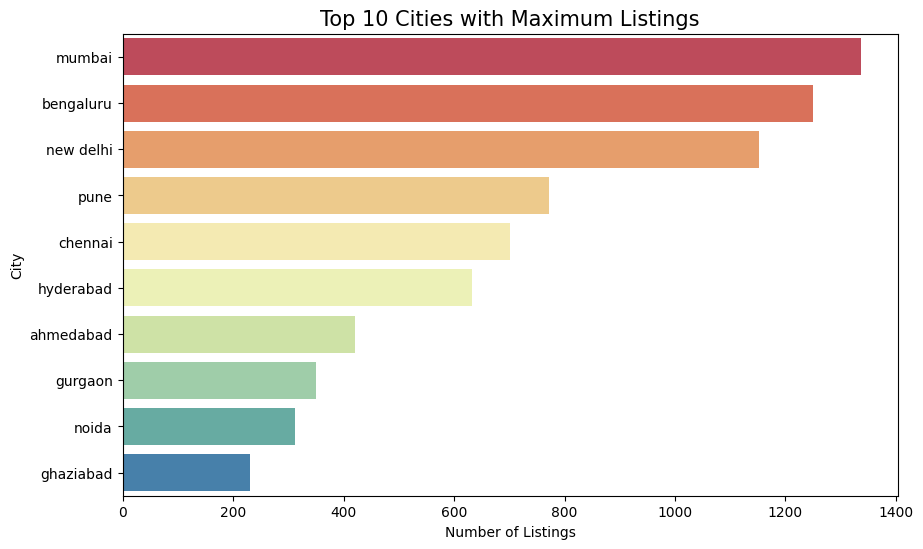

In [ ]:
plt.figure(figsize=(10,6))
top_cities = df['city'].value_counts().nlargest(10)
sns.barplot(y=top_cities.index, x=top_cities.values, palette='Spectral')
plt.title("Top 10 Cities with Maximum Listings", fontsize=15)
plt.xlabel("Number of Listings")
plt.ylabel("City")
plt.show()


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

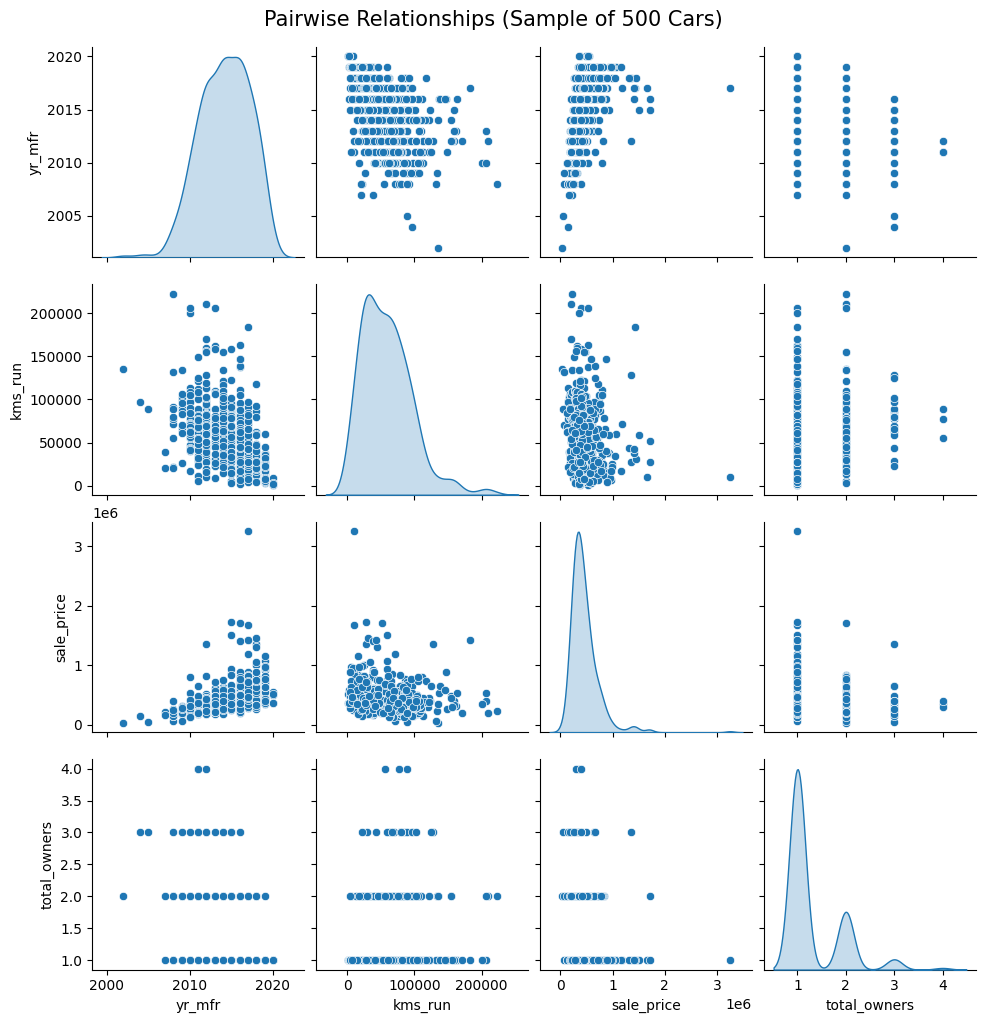

In [ ]:
sample_df = df[['yr_mfr','kms_run','sale_price','total_owners']].sample(500)
sns.pairplot(sample_df, diag_kind='kde', palette='husl')
plt.suptitle("Pairwise Relationships (Sample of 500 Cars)", y=1.02, fontsize=15)
plt.show()
